In [2]:
import yfinance as yf

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
tickerSymbol = "AAPL"

In [5]:
tickerData = yf.Ticker(tickerSymbol)

In [6]:
df= tickerData.history(period='id', start='2000-5-31', end='2023-5-31')

In [23]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-05-31 00:00:00-04:00,0.658386,0.691542,0.635176,0.636597,433507200,0.0,0.0
2000-06-01 00:00:00-04:00,0.619546,0.678753,0.609125,0.675438,903840000,0.0,0.0
2000-06-02 00:00:00-04:00,0.710489,0.755959,0.674490,0.701489,792848000,0.0,0.0
2000-06-05 00:00:00-04:00,0.707172,0.721856,0.679700,0.692015,323668800,0.0,0.0
2000-06-06 00:00:00-04:00,0.696989,0.733223,0.684437,0.703857,525481600,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-23 00:00:00-04:00,172.896534,173.146197,171.049023,171.328644,50747300,0.0,0.0
2023-05-24 00:00:00-04:00,170.859273,172.187481,170.290049,171.608261,45143500,0.0,0.0
2023-05-25 00:00:00-04:00,172.177494,173.665475,171.458464,172.756714,56058300,0.0,0.0


### Autoregression
#### An AR model is a time series forecasting model that uses a linear combination of past observations (lags) to predict future values. The order of the model, denoted as p, indicates how many past values are used.
#### Stationarity Requirement:
* Applying an AR model to stock price data often requires making the data stationary. Stock prices typically exhibit trends and may have seasonality (especially if trading patterns change with the time of year).
* Stationarity can be achieved by differencing the data (e.g., first-order differencing) to remove the trend component. This is a common preprocessing step before fitting an AR model.

<Figure size 2000x1000 with 0 Axes>

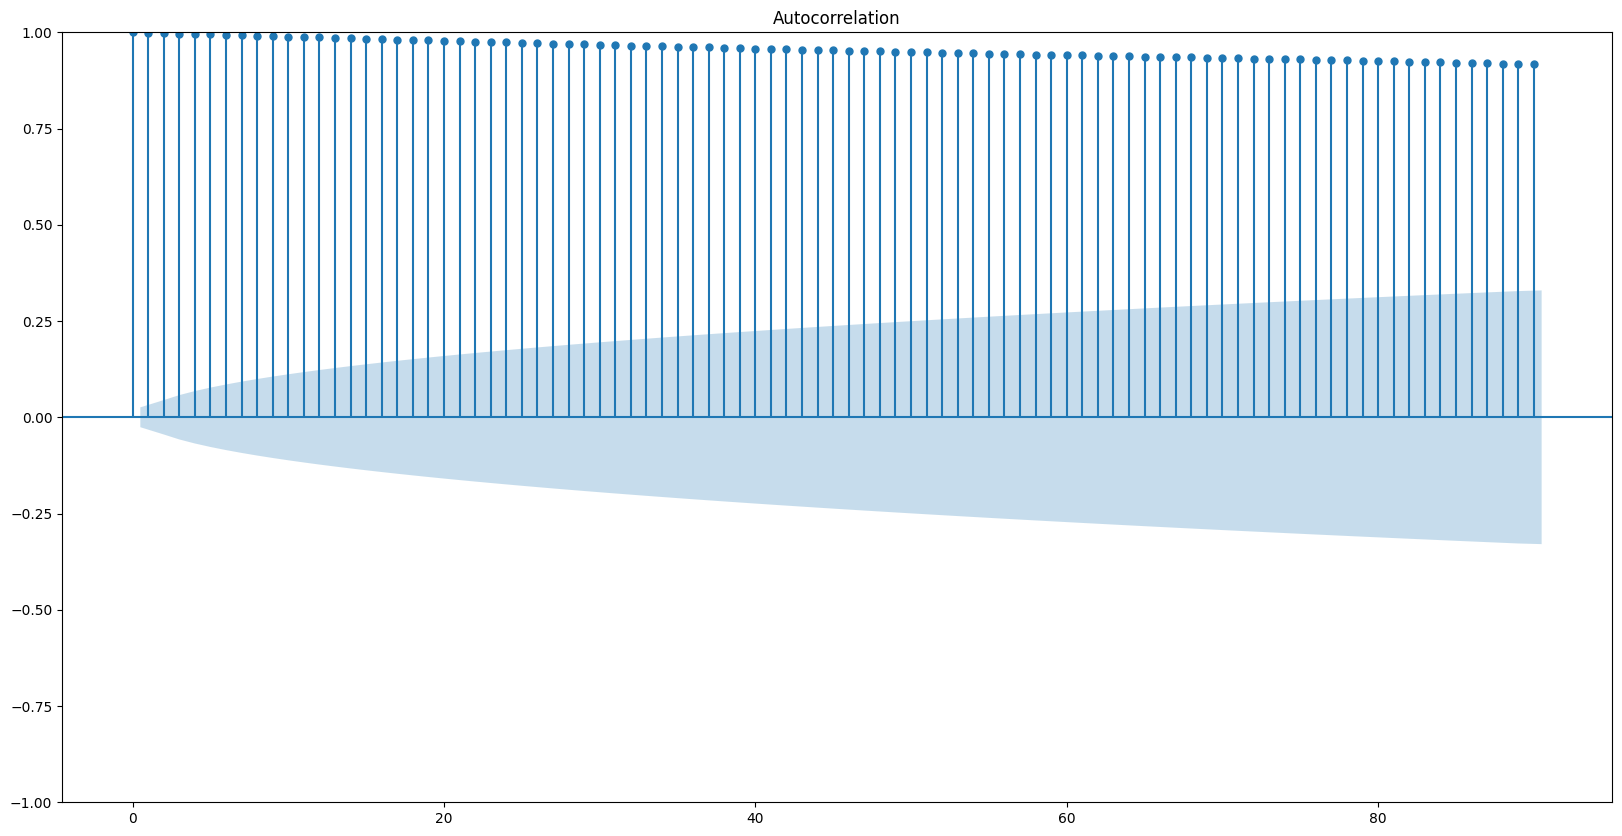

In [25]:
data = df.drop(['Close'],axis=1)#.head(100)
data_a = data.to_numpy().T[0]
data_a
# plt.figure(figsize=(20,10))
# plt.plot(data_a)

plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_acf(data_a, lags=90)
plt.show()

<Figure size 2000x1000 with 0 Axes>

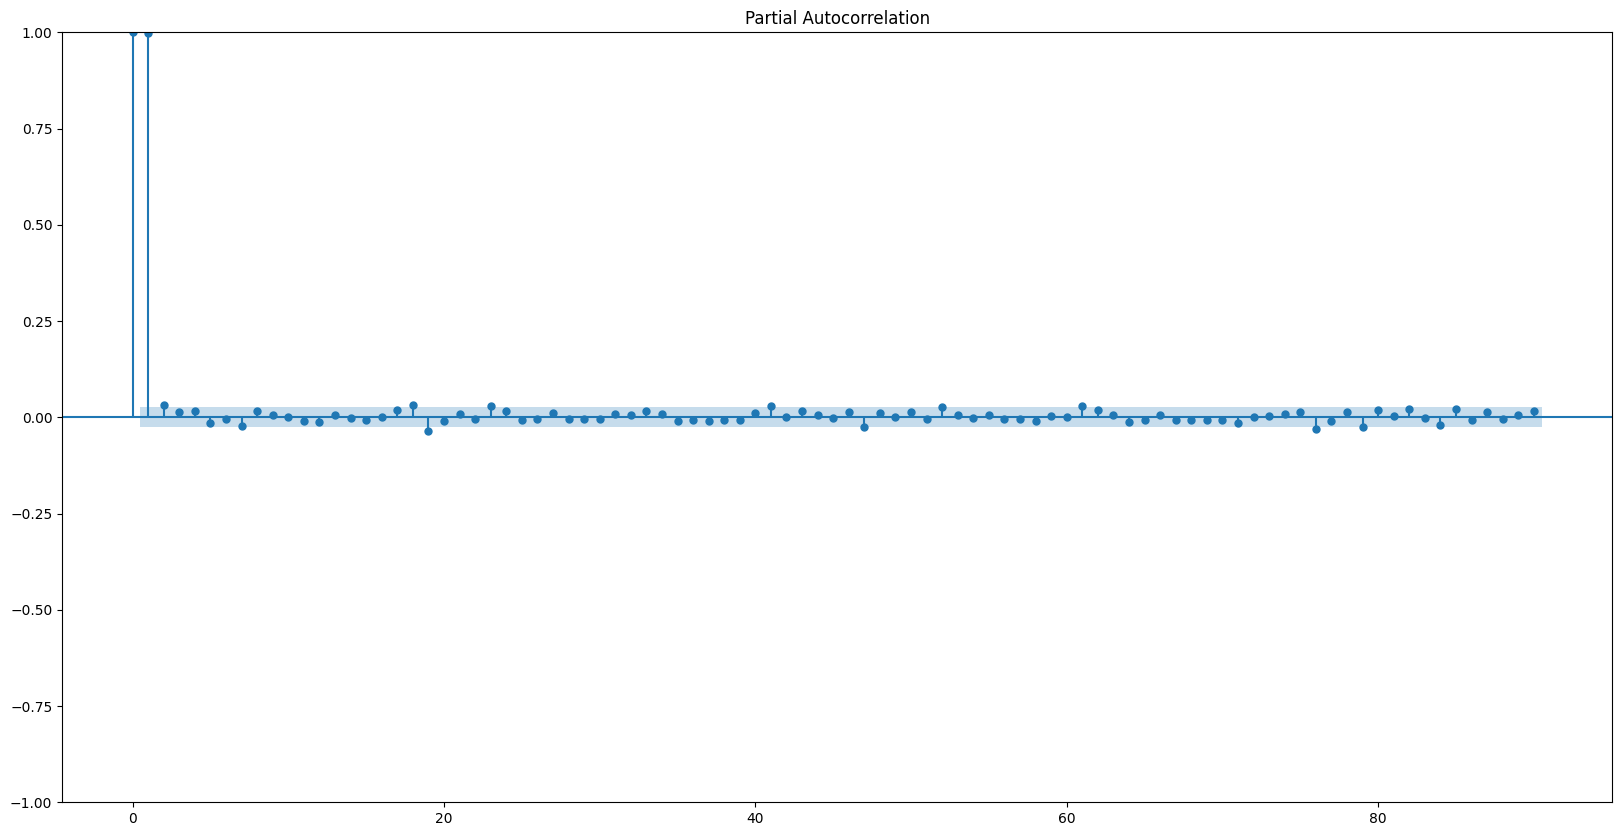

In [16]:
plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_pacf(data_a, lags=90)
plt.show()